## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


The first stage is understanding how the data set we have is built and what is included.

In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
data = pd.read_csv('data/kc_house_data.csv') 
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


After seeing our data set we need to understand the purpose of each column and what it describes, luckily we have the file 'column_names.md' that has a short description of each column.

In [386]:
import markdown

with open('data/column_names.md', 'r') as f:
    text = f.read()
    html = markdown.markdown(text)
text

'# Column Names and Descriptions for King County Data Set\n* `id` - Unique identifier for a house\n* `date` - Date house was sold\n* `price` - Sale price (prediction target)\n* `bedrooms` - Number of bedrooms\n* `bathrooms` - Number of bathrooms\n* `sqft_living` - Square footage of living space in the home\n* `sqft_lot` - Square footage of the lot\n* `floors` - Number of floors (levels) in house\n* `waterfront` - Whether the house is on a waterfront\n  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts\n* `view` - Quality of view from house\n  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other\n* `condition` - How good the overall condition of the house is. Related to maintenance of house.\n  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glo

In [387]:
data.drop(['id','sqft_above','sqft_basement','zipcode','lat','long'],
          inplace=True,axis=1)
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1955,0.0,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,1951,1991.0,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,1933,NaN,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1965,0.0,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1987,0.0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,2009,0.0,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2014,0.0,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,2009,0.0,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,2004,0.0,1410,1287


we can see in the dataframe a few NaN value, we need to check how many are there and how can we take care of them.

In [388]:
data.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
yr_built            0
yr_renovated     3842
sqft_living15       0
sqft_lot15          0
dtype: int64

as we can see the NaN values are found only on the waterfront column, as it is a boolean value we can't use a mean value to fill the blanks, next we'll check how removing these rows will affect the distribution 

In [389]:
data['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [390]:
data['waterfront'].isna().sum()

2376

after getting a numerical value to each of the outcome options (yes,no and NaN) lets see how the ratio will change if we drop the NaN rows. 

In [391]:
naincluded=data[data['waterfront']=='YES']['waterfront'].count()/data[
    'waterfront'].count()
naremoved=data[data['waterfront']=='YES']['waterfront'].count()/(data[
    'waterfront'].count()-data['waterfront'].isna().sum())
naincluded-naremoved

-0.0010714016184157444

there will be a change of 0.1% which is acceptable in order to not create misleading values by changing NaN values by statistical distribution based on yes-no ratio.

In [392]:
data['waterfront'].fillna(0, inplace=True)
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,7 Average,1955,0.0,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,1951,1991.0,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,1933,NaN,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1965,0.0,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1987,0.0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,2009,0.0,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2014,0.0,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,2009,0.0,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,Average,8 Good,2004,0.0,1410,1287


In [393]:
#Convert year_built to age
data['age'] = 2015 - data['yr_built']
data = data.drop(columns=['yr_built'], axis=1)

In [394]:
date = data['date'].str.split('/', expand=True)
data['year_sold'] = date[2].astype('float64')
data.drop(columns=['date'], axis=1, inplace=True)

In [395]:
data.yr_renovated.fillna(0.0, inplace=True)
data['renovated'] = data['year_sold'] - data['yr_renovated']
#Replace any values less than 10 with 1, and any values over 10 with 0
renovated = data.renovated.values
age = data.age.values
values = np.where(renovated <= 10, 1, 0)
data['renovated'] = np.where(age <= 5, 1, values)

#Drop yr_renovated column
data.drop(columns=['yr_renovated'], axis=1, inplace=True)

In [396]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  object 
 7   view           21534 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_living15  21597 non-null  int64  
 11  sqft_lot15     21597 non-null  int64  
 12  age            21597 non-null  int64  
 13  year_sold      21597 non-null  float64
 14  renovated      21597 non-null  int32  
dtypes: float64(4), int32(1), int64(6), object(4)
memory usage: 2.4+ MB


In [397]:
data.replace({'6 Low Average':6,
                   '5 Fair':5,
                  '11 Excellent':11,
                  '12 Luxury':12,
                  '13 Mansion':13,
                  '3 Poor':3,
                  '4 Low':4,
                  '7 Average':7,
                  '8 Good':8,
                  '9 Better':9,
                  '10 Very Good':10},inplace=True)
data.astype({'grade': 'int64'})

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_living15,sqft_lot15,age,year_sold,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,7,1340,5650,60,2014.0,0
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7,1690,7639,64,2014.0,0
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6,2720,8062,82,2015.0,0
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7,1360,5000,50,2014.0,0
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8,1800,7503,28,2015.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8,1530,1509,6,2014.0,0
21593,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8,1830,7200,1,2015.0,1
21594,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7,1020,2007,6,2014.0,0
21595,400000.0,3,2.50,1600,2388,2.0,0,NONE,Average,8,1410,1287,11,2015.0,0


In [398]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_living15,sqft_lot15,age,year_sold,renovated
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,7.657915,1986.620318,12758.283512,44.000324,2014.322962,0.070565
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,1.173200,685.230472,27274.441950,29.375234,0.467619,0.256103
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,3.000000,399.000000,651.000000,0.000000,2014.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,7.000000,1490.000000,5100.000000,18.000000,2014.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,7.000000,1840.000000,7620.000000,40.000000,2014.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,8.000000,2360.000000,10083.000000,64.000000,2015.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,13.000000,6210.000000,871200.000000,115.000000,2015.000000,1.000000


In [399]:

df = pd.get_dummies(data,drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21597 non-null  float64
 1   bedrooms             21597 non-null  int64  
 2   bathrooms            21597 non-null  float64
 3   sqft_living          21597 non-null  int64  
 4   sqft_lot             21597 non-null  int64  
 5   floors               21597 non-null  float64
 6   grade                21597 non-null  int64  
 7   sqft_living15        21597 non-null  int64  
 8   sqft_lot15           21597 non-null  int64  
 9   age                  21597 non-null  int64  
 10  year_sold            21597 non-null  float64
 11  renovated            21597 non-null  int32  
 12  waterfront_NO        21597 non-null  uint8  
 13  waterfront_YES       21597 non-null  uint8  
 14  view_EXCELLENT       21597 non-null  uint8  
 15  view_FAIR            21597 non-null 

**Multiple Linear Regression Assumptions**<br>
There are four assumptions that must be checked as part of the multiple linear regression analysis process:

-No multicollinearity <br>
-Linear relationship between explanatory and response variables <br>
-Homoscedasticity of error terms<br>
-Normal distribution of model residuals<br>

We’ll dig deeper into each of these assumptions before finalizing the Regression.

**Multicollinearity**
Using seaborn, I created a heatmap of correlations between each variable and all the others. The absolute value of the correlations was calculated because only the strength, not the direction, of a linear relationship matters for satisfying this assumption.

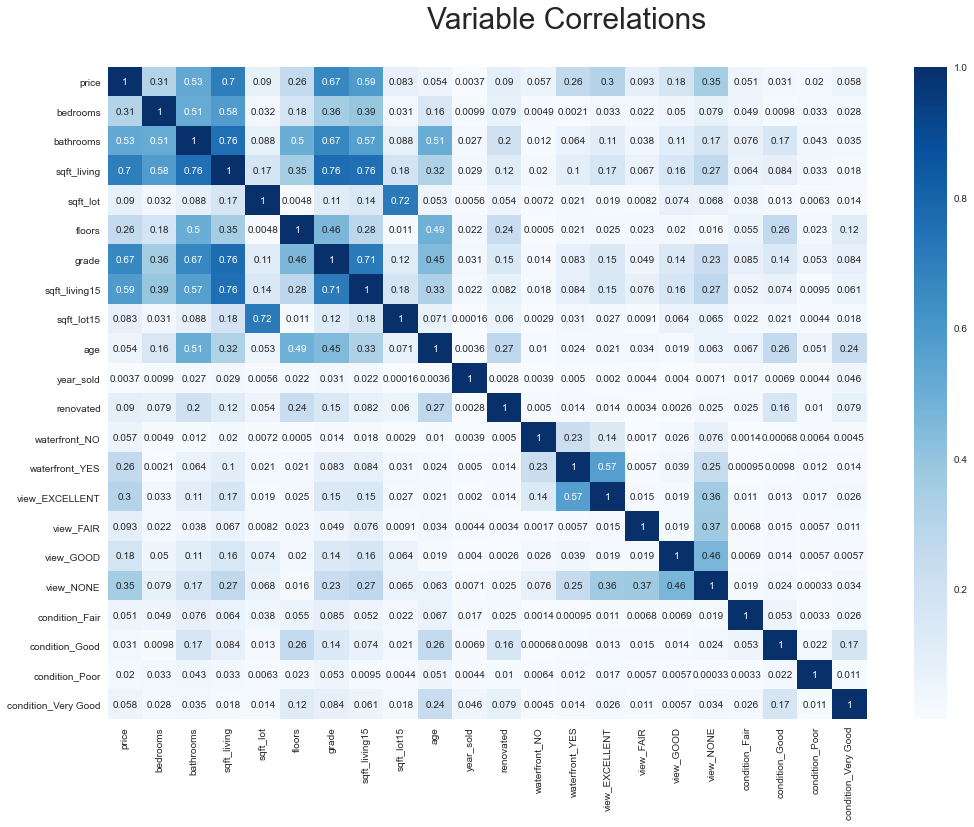

In [400]:

corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95)
heatmap = sns.heatmap(corr, cmap='Blues', annot=True)

In [401]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]
dfnoprice = df.drop(['price'],axis=1)
print("Top Absolute Correlations with price")
print(get_top_abs_correlations(dfnoprice, 20))

Top Absolute Correlations with price
sqft_living     grade             0.762779
                sqft_living15     0.756402
bathrooms       sqft_living       0.755758
sqft_lot        sqft_lot15        0.718204
grade           sqft_living15     0.713867
bathrooms       grade             0.665838
bedrooms        sqft_living       0.578212
bathrooms       sqft_living15     0.569884
waterfront_YES  view_EXCELLENT    0.567871
bedrooms        bathrooms         0.514508
bathrooms       age               0.507173
                floors            0.502582
floors          age               0.489193
view_GOOD       view_NONE         0.463790
floors          grade             0.458794
grade           age               0.447865
bedrooms        sqft_living15     0.393406
view_FAIR       view_NONE         0.372238
view_EXCELLENT  view_NONE         0.364721
bedrooms        grade             0.356563
dtype: float64


In [402]:
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_with_price = pd.DataFrame({'Correlations':correlations, 'Features': features})
print('Correlations with Price')
display(corr_with_price.sort_values(['Correlations'],ascending=False))

Correlations with Price


,Correlations,Features
2,0.701917,sqft_living
3,0.667951,grade
4,0.585241,sqft_living15
1,0.525906,bathrooms
6,0.353770,view_NONE
0,0.308787,bedrooms
5,0.303059,view_EXCELLENT


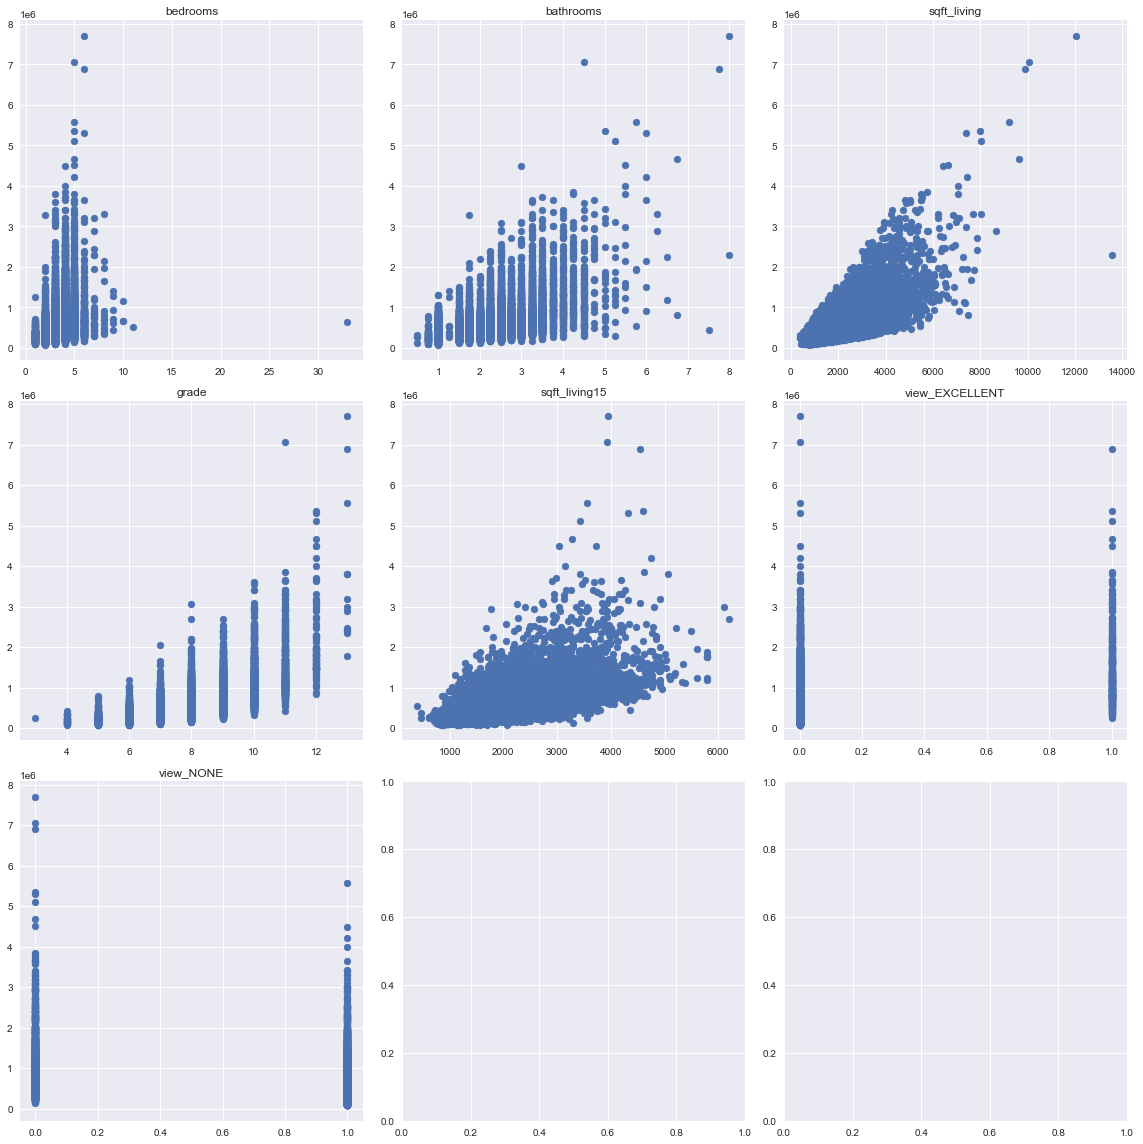

In [403]:

fig, axes = plt.subplots(nrows=(len(corr_with_price['Features']) // 2), ncols=3, figsize=(16,16))

corr_featurs = corr_with_price['Features'].values
for col, ax in zip(corr_featurs, axes.flatten()):
    ax.scatter(y=df['price'],x=df[col].dropna())
    ax.set_title(col)
    
fig.tight_layout()
plt.show()

In [404]:
outcome = 'price'
x_cols= corr_featurs
x_cols=list(x_cols)

y = df.price
X = df[x_cols]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=None,
                                                    random_state=42
)
X_train.describe()

,bedrooms,bathrooms,sqft_living,grade,sqft_living15,view_EXCELLENT,view_NONE
count,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000
mean,3.372229,2.116426,2083.693030,7.658702,1987.809286,0.015126,0.900475
std,0.905951,0.768049,918.209756,1.169277,685.189105,0.122059,0.299374
min,1.000000,0.500000,370.000000,3.000000,399.000000,0.000000,0.000000
25%,3.000000,1.750000,1430.000000,7.000000,1490.000000,0.000000,1.000000
50%,3.000000,2.250000,1912.000000,7.000000,1840.000000,0.000000,1.000000
75%,4.000000,2.500000,2560.000000,8.000000,2360.000000,0.000000,1.000000
max,11.000000,8.000000,13540.000000,13.000000,6210.000000,1.000000,1.000000


In [406]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     4346.
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        20:41:51   Log-Likelihood:            -2.9790e+05
No. Observations:               21597   AIC:                         5.958e+05
Df Residuals:                   21589   BIC:                         5.959e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.214e+05   1.56e+04    -20.571      0.000   -3.52e+05   -2.91e+05
bedrooms       -3.041e+04   2206.891    -13.781      0.000   -3.47e+04   -2.61e+04
bathrooms      -2.141e+04   3341.296     -6.407      0.000    -2.8e+04   -1.49e+04
sqft_living      200.7036      3.809     52.688      0.000     193.237     208.170
grade           9.312e+04   2341.493     39.772      0.000    8.85e+04    9.77e+04
sqft_living15     -1.5972      3.827     -0.417      0.676      -9.099       5.904
view_EXCELLENT   4.35e+05   1.44e+04     30.108      0.000    4.07e+05    4.63e+05
view_NONE      -1.382e+05   5943.903    -23.250      0.000    -1.5e+05   -1.27e+05
==============================================================================
Omnibus:                    15925.482   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           969955.043
Skew:                           2.974   Prob(JB):                         0.00
Kurtosis:                      35.288   Cond. No.                     3.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Normality of Residuals** <br>
Quantile-quantile plots are one way to check the normality assumption. If the residuals are normally distributed, their points will mostly fall along a straight line. Below is a Q-Q plot of the model’s residuals.

<ipython-input-407-d525230cb318>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


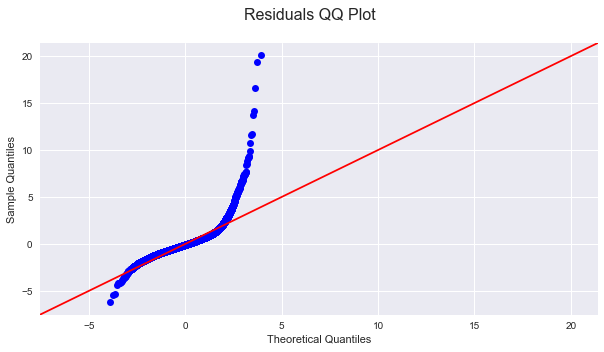

In [407]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16)
fig.set_size_inches(10, 5)
fig.show()

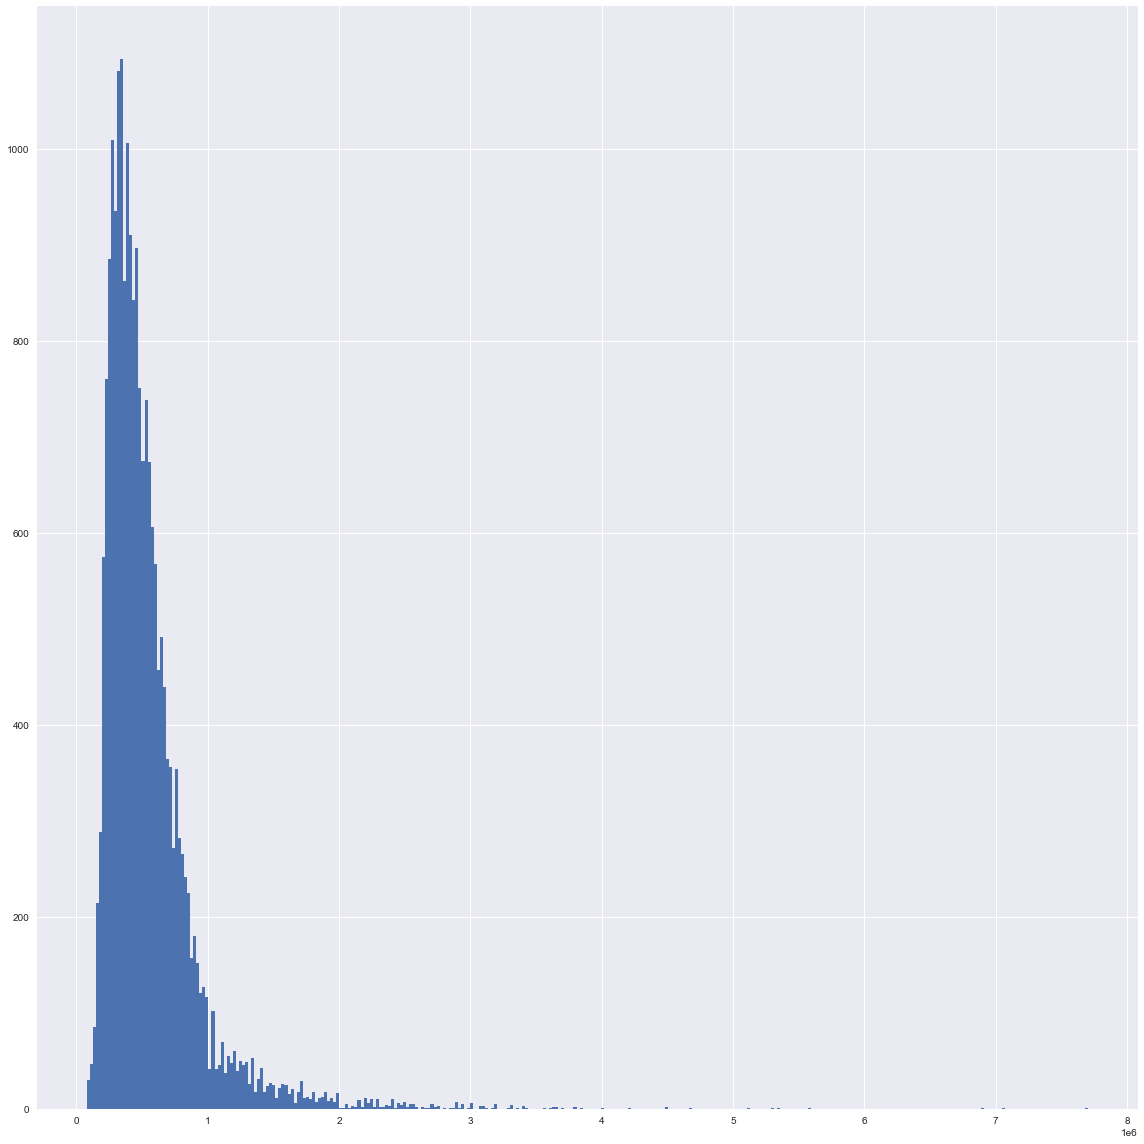

In [408]:
fig, ax = plt.subplots(figsize=(16,16))
ax.hist(x=df['price'], bins='auto')
ax.set_xscale('linear')
fig.tight_layout()

we can see that the data is skewed but most of the listings could be found under million dollars. <br>
in an attempt to fix it and balance our qq plot we'll see how dropping values of over a million will affect our results 

In [409]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))


0.8 percentile: 700435.9999999998
0.81 percentile: 718000.0
0.82 percentile: 730000.72
0.83 percentile: 749950.0
0.84 percentile: 760003.2
0.85 percentile: 779721.9999999991
0.86 percentile: 799000.0
0.87 percentile: 815000.0
0.88 percentile: 836739.9999999998
0.89 percentile: 859967.6
0.9 percentile: 887000.0
0.91 percentile: 919993.6
0.92 percentile: 950000.0
0.93 percentile: 997964.0000000002
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0
0.99 percentile: 1970000.0


In [410]:
orig_tot = len(df)
df_red = df # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df_red.price = df.price.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

Percent removed: 0.0


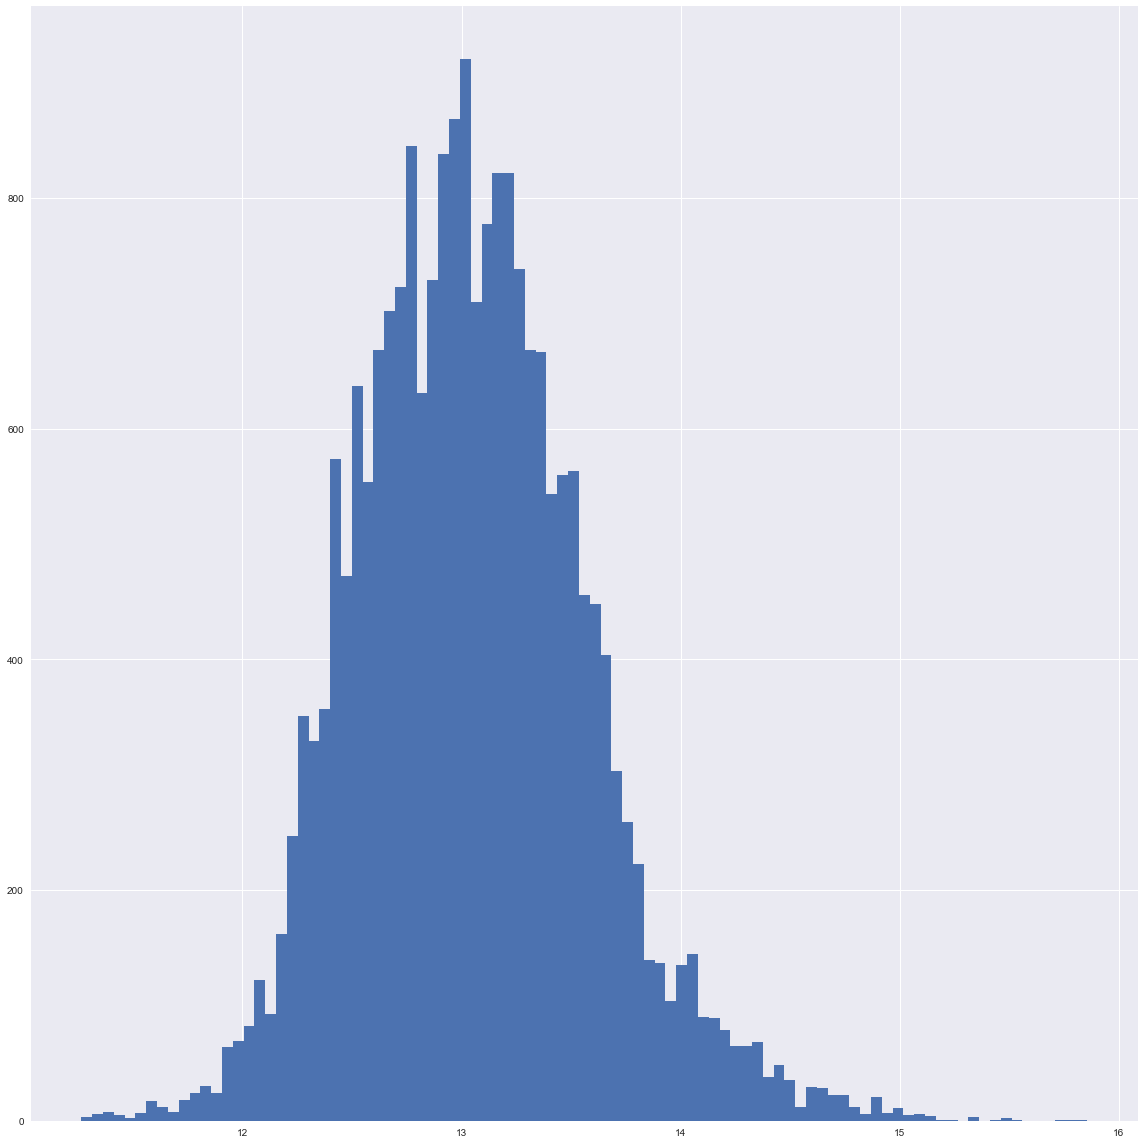

In [411]:
fig, ax = plt.subplots(figsize=(16,16))
ax.hist(x=df_red['price'], bins='auto')
ax.set_xscale('linear')
fig.tight_layout()

In [414]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_red).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     4240.
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        20:42:19   Log-Likelihood:                -7452.5
No. Observations:               21597   AIC:                         1.492e+04
Df Residuals:                   21589   BIC:                         1.498e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.4574      0.023    507.928      0.000      11.413      11.502
bedrooms          -0.0091      0.003     -2.865      0.004      -0.015      -0.003
bathrooms         -0.0034      0.005     -0.715      0.475      -0.013       0.006
sqft_living        0.0002    5.5e-06     33.781      0.000       0.000       0.000
grade              0.1694      0.003     50.098      0.000       0.163       0.176
sqft_living15   5.741e-05   5.53e-06     10.390      0.000    4.66e-05    6.82e-05
view_EXCELLENT     0.2825      0.021     13.545      0.000       0.242       0.323
view_NONE         -0.1920      0.009    -22.374      0.000      -0.209      -0.175
==============================================================================
Omnibus:                       26.425   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.197
Skew:                           0.029   Prob(JB):                     9.18e-06
Kurtosis:                       2.850   Cond. No.                     3.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-415-d525230cb318>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


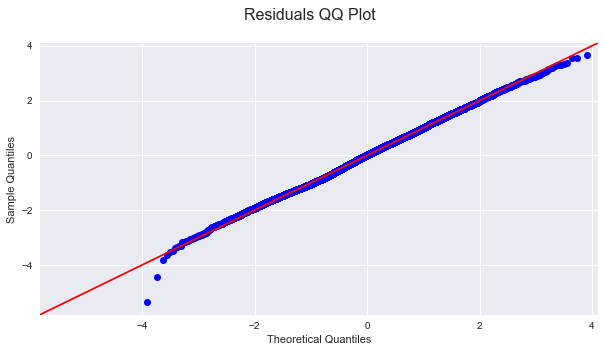

In [415]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16)
fig.set_size_inches(10, 5)
fig.show()

we can see that our normality residuals is fine now<br>
looking at the p values in our new model it evident that we have a value that is insignificant , bathrooms. <br>
let's see what happens when its dropped.

In [416]:
x_cols.remove('bathrooms')

In [417]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_red).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     4947.
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        20:42:38   Log-Likelihood:                -7452.7
No. Observations:               21597   AIC:                         1.492e+04
Df Residuals:                   21590   BIC:                         1.498e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.4589      0.022    510.185      0.000      11.415      11.503
bedrooms          -0.0095      0.003     -3.042      0.002      -0.016      -0.003
sqft_living        0.0002   5.07e-06     36.369      0.000       0.000       0.000
grade              0.1687      0.003     51.562      0.000       0.162       0.175
sqft_living15   5.768e-05   5.51e-06     10.466      0.000    4.69e-05    6.85e-05
view_EXCELLENT     0.2827      0.021     13.555      0.000       0.242       0.324
view_NONE         -0.1922      0.009    -22.401      0.000      -0.209      -0.175
==============================================================================
Omnibus:                       26.973   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.696
Skew:                           0.030   Prob(JB):                     7.15e-06
Kurtosis:                       2.850   Cond. No.                     3.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

we can see that our R-squared stayed the same while we took out an insignificant predictor.

<ipython-input-418-d525230cb318>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


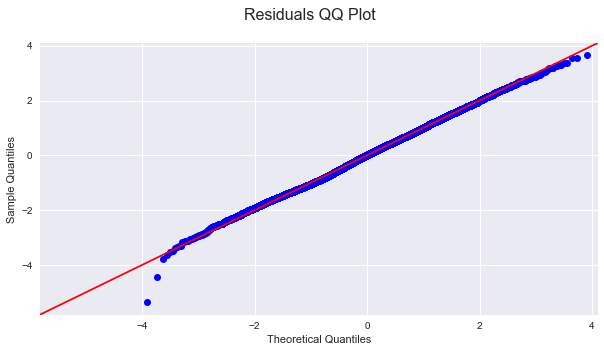

In [418]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16)
fig.set_size_inches(10, 5)
fig.show()

Text(0.5, 0.99, 'Residuals Scatterplot')

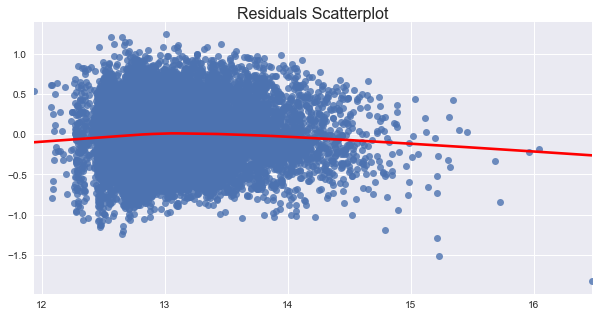

In [419]:
plt.figure(figsize=(10,5))
sns.regplot(x=model.predict(), y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99)